# Customer Segmentation Using Credit Bank Data

####  This project comprises of using user data from a german bank to conduct customer segmentation of loans given to people. By conducting customer segmentation we are able to figure out average characteristics of customers issued loans in various categories.

### Background on Data

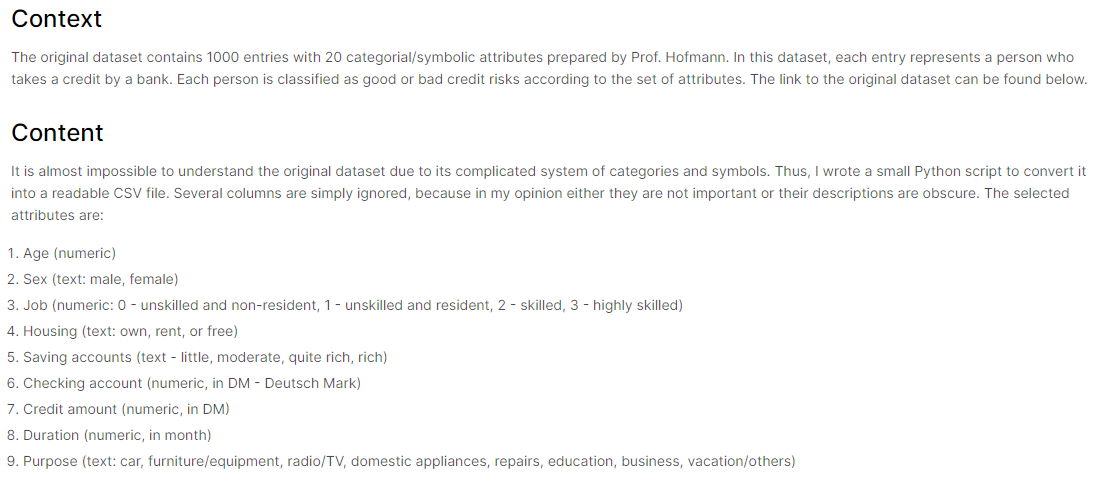

In [ ]:
# Read data as csv file
data=pd.read_csv("german_credit_data.csv")

### Make scatterplots of datapoints

In [ ]:
# Function to make scatterplots
def scatters(data, h=None, pal=None):
    fig, (a, b, c) = plt.subplots(3,1, figsize=(8,14))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=a)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=b)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=c)
plt.tight_layout()

In [ ]:
# Based on Sex
scatters(data, h="Sex")

# Based on Job
scatters(data, h="Job")

### Correlation Heatmap

In [ ]:

corrMatrix=data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Regression Plots to further look into correlations

In [ ]:
# Reggression Plot Between Credit Amount and Duration based on Sex
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data, palette="Set2", aspect=2)
plt.show()

In [ ]:
# Reggression Plot Based on Jobs
sns.lmplot(x="Credit amount",y="Duration", hue="Job", data=data, palette="Set1", aspect=2)
plt.show()


### Barplots to Look into Credits Issued

In [ ]:
# Barplots to summarize overall
byjob = data.groupby("Job")["Age"].count().rename("Number").reset_index()
byjob.sort_values(by=["Number"], ascending=False, inplace=True)

plt.figure(figsize=(10,7))
bar1 = sns.barplot(x="Job",y="Number",data=byjob)
bar1.set_xticklabels(bar1.get_xticklabels())
plt.ylabel("Number of Credits Issued")
plt.tight_layout()

In [ ]:
bypurpose = data.groupby("Purpose")["Age"].count().rename("Number").reset_index()
bypurpose.sort_values(by=["Number"], ascending=False, inplace=True)
plt.figure(figsize=(10,7))
bar2 = sns.barplot(x="Purpose",y="Number",data=bypurpose)
bar2.set_xticklabels(bar2.get_xticklabels(),rotation=90)
plt.ylabel("Number of Credits Issued")
plt.tight_layout()

### Boxplot to look at Outliers and Overall Spread

In [ ]:
# Function to make boxplots
def boxplt(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,7))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=90)
    fig.subplots_adjust(bottom=0.4)
    plt.tight_layout()

In [ ]:
# Boxplots based on Duration and Purpose
boxplt("Purpose","Duration","Sex")


In [ ]:
# Boxplots Based on Credit amount and Purpose
boxplt("Purpose","Credit amount","Sex")

### Data Profiling for Overall View

In [ ]:
data.profile_report()

##### By looking at the above data report we can see that three variables which are Age, Credit Amount and Duration have a Right Skew.

### Log Transform Variables which are Right Skewed

In [ ]:
def distributions(df): # This function is to plot histograms of variables that are right skewed
    fig, (a, b, c) = plt.subplots(3,1, figsize=(10,7))
    sns.distplot(df["Age"], ax=a,color="r")
    sns.distplot(df["Credit amount"], ax=b,color="g")
    sns.distplot(df["Duration"], ax=c,color="b")
    plt.tight_layout()

In [ ]:
distributions(np.log(data[["Age","Credit amount","Duration"]]))

In [ ]:
#Dataset containing Log of these three variables
data2=data[["Age","Credit amount","Duration"]]

data2_log=np.log(data2)

# Scale data
scale=StandardScaler()
data_sc=scale.fit_transform(data2_log)

### How Many Clusters To Seed

In [ ]:
clusters_range = range(2,10)
random_range = range(0,20)
result=[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_lab = clusterer.fit_predict(data_sc)
        silhouette_avg = silhouette_score(data_sc, cluster_lab)
        result.append([c,r,silhouette_avg])

result = pd.DataFrame(result, columns=["n_clusters","seed","silhouette_score"])
pivot_result = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(12,7))
sns.heatmap(pivot_result, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

#### By looking at the heatmap above we can determine that two or three clusters will be ideal in this scenario.

## KMeans Clustering

In [ ]:
kmean=KMeans(n_clusters=3, random_state=1).fit(data_sc)
labels=pd.DataFrame(kmean.labels_)
data_clustered=clustered=data2.assign(Cluster=labels)

### Show Clusters as Scatterplots

In [ ]:
scatters(data_clustered,"Cluster")

## Clusters Divided in Groups

In [ ]:
grouped_cluster=data_clustered.groupby(["Cluster"]).mean().round(2)
print(grouped_cluster)

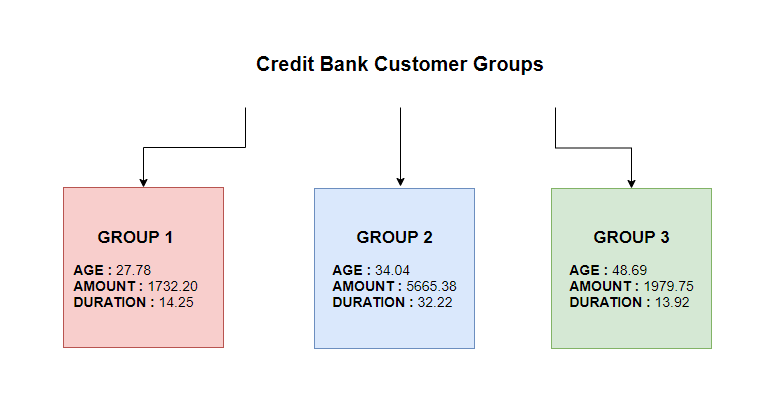